In [55]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib

load data and create train test split

In [56]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

y = data["label"]
X = data.drop("label", axis=1)

print(X.shape)
input_shape = X.shape[1]

X_train, X_val, y_train, y_val = train_test_split(X,y, stratify=y, train_size=0.75)

(42000, 784)


In [67]:
model = keras.Sequential([
    layers.Input(shape=[input_shape]),
    layers.BatchNormalization(),

    layers.Dense(1568, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(784, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.Dense(784, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),


    layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='crossentropy',
    metrics=['binary_accuracy'],
)



Best Validation Loss: 0.1391
Best Validation Accuracy: 0.1100


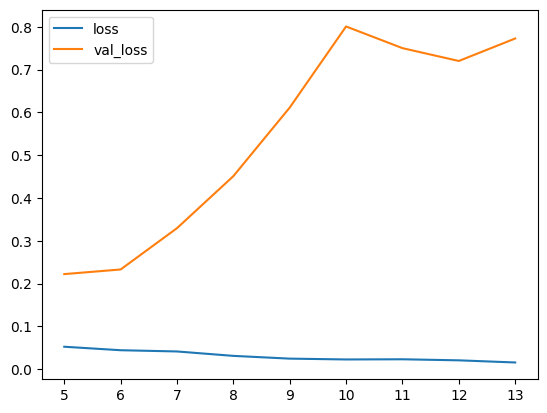

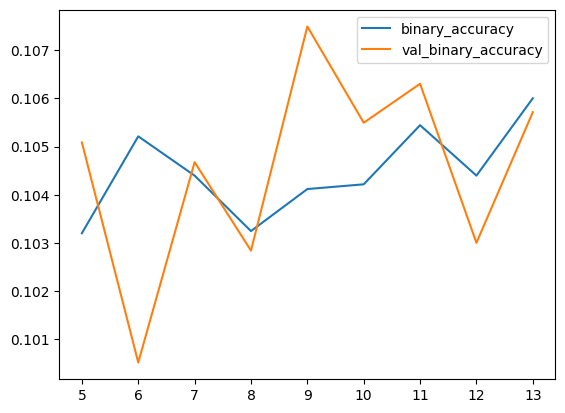

In [68]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=420,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0, # hide output
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

make predictions and generate sumbission

In [ ]:
predictions = model.predict(test_data).argmax(axis=1)

predictions_df = pd.DataFrame({
"ImageId": range(1,len(predictions) +1),
"Label": predictions
})

sumbission_file_name = f"submission_{pd.Timestamp.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"
predictions_df.to_csv(sumbission_file_name, index=False)

# attempt 1: 96.510%
# attempt 2: 96.196%
# attempt 3: 95.575%       ( elu activation) ovefit
# attempt 4: 96.201%          (0.4 dropout rate). graph 1 diverged
# attempt 5: 96.703%          (more basic model smaller hidden layers)





875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
